In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
features_file = '/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/features.npy'
features, scaled_features = np.load(features_file, allow_pickle=True)
targets_lowres_file = '/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/targets_lowres.npy'
targets_lowres = np.load(targets_lowres_file, allow_pickle=True)

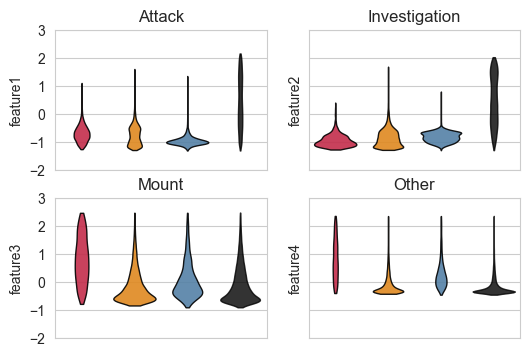

In [4]:
behavior_types = ['Attack', 'Investigation', 'Mount', 'Other']
cmap = ['crimson', 'darkorange', 'steelblue', 'k']
rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(6, 4), sharex=True, sharey=True)
indices_selected = [4, 8, 94, 99]
count = 0
data = {'class': targets_lowres,
        'feature1': scaled_features[:, indices_selected[0]],
        'feature2': scaled_features[:, indices_selected[1]],
        'feature3': scaled_features[:, indices_selected[2]],
        'feature4': scaled_features[:, indices_selected[3]]}

df = pd.DataFrame(data)
for row in range(rows):
    for col in range(cols):
        sns.violinplot(data=df[df[f"feature{count+1}"]<np.percentile(df[f"feature{count+1}"], 98)],
                       x="class", y=f"feature{count+1}", palette=cmap, ax=ax[row, col], inner=None,
                       cut=0, gridsize=100, linewidth=1, scale='area', width=0.8)
        for violin, alpha in zip(ax[row, col].collections[::1], [0.9, 0.9, 0.9, 0.8]):
            violin.set_alpha(alpha)
        ax[row, col].set_title(behavior_types[count])
        ax[row, col].set_xlim([-0.5, 3.5])
        ax[row, col].set_yticks(np.arange(-2, 3.1, 1))
        ax[row, col].set_xticks(np.arange(0, 4))
        ax[row, col].set_xlabel('')
        ax[row, col].set_xticklabels('')
        ax[row, col].set_ylim([-2, 3])
        count += 1

plt.show()